# Applied Spatial Data Analysis

   #### Basic Workflow
   * Getting spatial data
   * data preparation
   *  explortion
   *  visualization

ASDA is concerned with questions not directly answered by looking at the data themselves. Possible question may arise:

   * Are the incidence of a paticular disease clustered? Is there any underlaying factors such as age, poverty, or pollution?
   * Given the number of observed samples, which part of the study area is polluted?
   * Given the scattered air quality measurements, how many people are exposed to high levels of black smoke and where do they live?
   * Do governments tend to compare their policies with those of their neighbours, or do they behave independently?
    
  Spatial statistics have three main areas:
  
  * Point processes
  * Geostatistics
  * Areal data
    
 ### Most important R packages
 
 Packages are necessary to deal with different data structures (classes) and provide methods necessary for spatial data analysis.
 
 **Classes:** specify a structure and define how spatial data are organized and stored.
 **Methods:** are instances of functions specialized for a particular data class
 
 * sp package with classes and methods for spatial data such as points, lines, polygons, and grid.
 
 * ctv package
 
 ### GIS
 
 
Storage and analysis is traditionally done in Geographical Information Systems (GIS).
    **GIS:** "a tool for collecting, storing, retrieving, transforming, and displaying spatial data form the real world for a particular set of purposes"
    
### Types of spatial data

 Spatial data have spatial referece: coordinate values and a system of reference for these coordinates. The most common is to refer to the prime meridian at Greenwich and zero latitude at the equator (The World Geodetic System, WGS84).
 
 1. Point: a single point location, such as GPS geocode (**vector**)
     * 2 or 3 dimensions
     * single coordinate
     * Present in SpatialPoints object
     * SpatialPoints + row attibutes = SpatialPointsDataFrame
     * Coordinate and attribute may be key for each other
     * Spatial obejecs are rarely created from scratch. More often they are promoted.
 2. Line: se of ordered points, connected by straight line segments (**vector**)
     * Line object is a collection of 2D coordinates (contours)
     * Lines object is a list of Line object
     * SpatialLines object are made from lists of Lines
     * SpatialLinsDataFrame extends SpatialLines and contain objects and data frames
     * require ID field value to match data fram row names
 3. Polygon: an area, marked by on or more encluosin`g lines, possible containing holes. (**vector**)
     * Line object with equal first and last coordinates
     * SpatialPolygon are made from list of Polygon objects
     * SpatialPolygonsDataFrame expands SpatialPolygons classes
     * require ID field value to match data fram row names
 4. Grid: a collection of points or rectangular cells, organized in a regular lattice. (**raster**)
 
 Collected points carries implicit and explicit attributes (features of the data). 
 
 Spation data answer the questions:
     ##### where is it?
     ##### what is where?
     
## Classes for Spatial Data in R


### Packages

* sp - classes and methods for spatial data
* rgdal - Importa and exporting geospatial data formats
* raster - To work with raster data
* tmap - thematic map
* ggplot2 - Data visualization
* ggmap - maps from Google Maps, Open Street Maps
* leaflet - Interactive maps within R
* spatstat - Spatial point pattern analysis
* gstat - Geostatistical modeling

### Introduction

Most sources of spatial data involve points, ususally two real numbers representing position in a known coordinate reference system that can be combined to form a line of segments. The lines can also be combined to for networks or polygons, regular grids.
    Grids are regular polygon, usually a rectangle, with a given resolution-the size of the grid cells. Choices involve trade-offs between accuracy, feasibility, and cost.
    It is unsual for spatial data to be defined in three dimentions, because of the close links between cartography and data models for spatial data. GIS-based data models do not fit time series data well either, even though some environmental monitoring data series are obserd in three dimensions and time.
    
## Spatial *Objects*

The foundation in the *Spatial* Object are two basic classes: 

1. The first is a bounding box, a **matrix** of numerical coodinates with column names c('min', 'max'), and at least two rows, with the first row easting (x-axis) and the second northing (y-axis). Most often the bounding box is generated automatically from the data in subclasses of **Spatial**.
2. The second is a **CRS** Class object defining the coordinate reference system, and my be set to 'missing', represented by NA in R.

The command getClass the be used to return the complete definition of a class, including its slot names and types of their contents

In [1]:
library(sp)

In [77]:
setwd("/home/erick/spatial-data-with-r")
#Sys.setlocale(locale="C")

In [3]:
getClass("Spatial")

Class "Spatial" [package "sp"]

Slots:
                              
Name:         bbox proj4string
Class:      matrix         CRS

Known Subclasses: 
Class "SpatialPoints", directly
Class "SpatialMultiPoints", directly
Class "SpatialGrid", directly
Class "SpatialLines", directly
Class "SpatialPolygons", directly
Class "SpatialPointsDataFrame", by class "SpatialPoints", distance 2
Class "SpatialPixels", by class "SpatialPoints", distance 2
Class "SpatialMultiPointsDataFrame", by class "SpatialMultiPoints", distance 2
Class "SpatialGridDataFrame", by class "SpatialGrid", distance 2
Class "SpatialLinesDataFrame", by class "SpatialLines", distance 2
Class "SpatialPixelsDataFrame", by class "SpatialPoints", distance 3
Class "SpatialPolygonsDataFrame", by class "SpatialPolygons", distance 2

In [4]:
getClass("CRS")

Class "CRS" [package "sp"]

Slots:
                
Name:   projargs
Class: character

"CRS" has a charater string as its only slot value, which may be a missin value. If it is not missing it should be a PROJ.4-format string describing the projection. For geographical coordinates, the simlpest such string is "+proj=longlat" using "longlat".

Let's built a simples **Spatial** Object from a bounding box matrix, and a missing coodinate reference system:

In [5]:
# Creating a matrix
m <- matrix(c(0, 0, 1, 1), ncol = 2, 
            dimnames = list(NULL, c("min", "max")))
m

min,max
0,1
0,1


In [6]:
#creating a empty CRS 
crs <- CRS(projargs = as.character(NA))
crs

CRS arguments: NA 

In [7]:
# Creating an Object of the class "Spatial" with two attritutes
S <- Spatial(bbox = m, proj4string = crs)
S

An object of class "Spatial"
Slot "bbox":
     min max
[1,]   0   1
[2,]   0   1

Slot "proj4string":
CRS arguments: NA 


In [8]:
Spatial(matrix(c(350, 85, 370, 95), ncol = 2, 
               dimnames = list(NULL, c("min", "max"))),
               proj4string = CRS("+longlat"))


An object of class "Spatial"
Slot "bbox":
     min max
[1,] 350 370
[2,]  85  95

Slot "proj4string":
CRS arguments: +longlat 


# SpatialPoints

<img src="./Applied_Spatial_Analysis_with_R/SpatialPointsDiagram.png">



The **SpatialPoints** class is the first subclass of **Spatial**, and a very important one. 

A two-dimensional point can be described by a pair of numbers (*x*,*y*), defined over a known region. the maximum possible range is the whole earth with the pair of numbers measured in degrees are a geographical coodinate showing where the point is located on the globe.
    The pair of number define the location on the sphere exactly, but if we represent the globe more accurately by an ellipsoid model, such as the World Geodetic System 1984. That corrects our undestanding of the shape of the earth.
    Geograpical coordinates can extend from latitude 90◦ to -90◦ in north-south direction and longitude 0◦ to 360◦ (-180◦ to 180◦) in east-west direction.
    Using read.table function, we read in a data file with the positions of CRAN mirros across the world. we extract the two columns with the longitude and latitude values into a matrix, and use **str** to view:

#### Input table as **dataframe**

In [40]:
CRAN_df <- read.table("CRAN051001a.txt", header = TRUE)
head(CRAN_df)

,place,north,east,loc,long,lat
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,Brisbane,27d28'S,153d02'E,Australia,153.03333,-27.46667
2,Melbourne,37d49'S,144d58'E,Australia,144.96667,-37.81667
3,Wien,48d13'N,16d20'E,Austria,16.33333,48.21667
4,Curitiba,25d25'S,49d16'W,Brazil,-49.26667,-25.41667
5,Vioza,20d45'S,42d52'W,Brazil,-42.86667,-20.75000
6,Rio de Janeiro,22d54'S,43d12'W,Brazil,-43.20000,-22.90000


#### Extract the long and lat columns to create the matrix

In [10]:
CRAN_mat <- cbind(CRAN_df$long, CRAN_df$lat)
# include row names to CRAN_mat
row.names(CRAN_mat) <- 1:nrow(CRAN_mat)

# Check the structure of CRAN_mat
head(CRAN_mat)
str(CRAN_mat)

1,153.03333,-27.46667
2,144.96667,-37.81667
3,16.33333,48.21667
4,-49.26667,-25.41667
5,-42.86667,-20.75000
6,-43.20000,-22.90000


 num [1:54, 1:2] 153 145 16.3 -49.3 -42.9 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:54] "1" "2" "3" "4" ...
  ..$ : NULL


* The **SpatialPoints** class extends the **Spatial** class by adding a coords slot into which a matric of point coodinates can be inseted

In [11]:
getClass("SpatialPoints")

Class "SpatialPoints" [package "sp"]

Slots:
                                          
Name:       coords        bbox proj4string
Class:      matrix      matrix         CRS

Extends: "Spatial"

Known Subclasses: 
Class "SpatialPointsDataFrame", directly
Class "SpatialPixels", directly
Class "SpatialPixelsDataFrame", by class "SpatialPixels", distance 2

In [12]:
# Establing the type of projection, in this case WGS84
llCRS <- CRS("+proj=longlat +ellps=WGS84")

# Create an SpatialPoints object with CRAN_mat on llCRS coordinate reference system
CRAN_sp <- SpatialPoints(CRAN_mat, proj4string = llCRS)
summary(CRAN_sp)

# the projection is FALSE because we are using longlat in the projection description

Object of class SpatialPoints
Coordinates:
                 min      max
coords.x1 -122.95000 153.0333
coords.x2  -37.81667  57.0500
Is projected: FALSE 
proj4string : [+proj=longlat +ellps=WGS84]
Number of points: 54

## Methods

Methods are available to access the values of the slots of **Spatial** Objects. 
   * bbox method returns the bounding box of the object and is used to plot the object and to handling data objects
   * project4string method reports the projection string contained as a CRS object

In [13]:
# bbox method
bbox(CRAN_sp)

,min,max
coords.x1,-122.95000,153.0333
coords.x2,-37.81667,57.0500


In [14]:
# We can alter the projection to a CRS object containing a charater NA value
proj4string(CRAN_sp)

# reseting to NA
proj4string(CRAN_sp) <- CRS(as.character(NA))
proj4string(CRAN_sp)

# restating the WGS84 projection
proj4string(CRAN_sp) <- llCRS
proj4string(CRAN_sp)

[1] "+proj=longlat +ellps=WGS84"

[1] NA

[1] "+proj=longlat +ellps=WGS84"

   * Extracting the coodinates from a **SpatialPoints** Object as a numberic matrix is as simple as using the **coodinates** method. 


In [15]:
brazil <- which(CRAN_df$loc == "Brazil")
brazil

# Unsing the coordinate method
coordinates(CRAN_sp)[brazil, ]

[1] 4 5 6 7 8

,coords.x1,coords.x2
4,-49.26667,-25.41667
5,-42.86667,-20.75000
6,-43.20000,-22.90000
7,-47.63333,-22.71667
8,-46.63333,-23.53333


**SpatialPoints** has summary and print methods.
   * Summary provides a number of information such as spatial entities, projection information, and bounding box.
   * Print gives a view of the data in the object
   
### Data frames for Spatial Point Data

**SpatialPoints** Object can behave like a data.frame. Often data comes from different sources and need to be merged. 

The **SpatialPoints-DataFrame** class is the container for this kind of spatial point information. It can be construct in different ways such as if the row names and the match.ID argument is set to its default value of TRUE, then the matrix row name are checked agains the row names of the data frame. 
   * if in different order, data frame will be reordered
   * if does match, no **SpatialPoints-DataFrame** Object will be created.
    

In [16]:
str(row.names(CRAN_df))

 chr [1:54] "1" "2" "3" "4" "5" "6" "7" "8" "9" "10" "11" "12" "13" "14" ...


In [18]:
CRAN_spdf1 <- SpatialPointsDataFrame(CRAN_mat, CRAN_df,
                                     proj4string = llCRS, 
                                     match.ID = TRUE)
head(CRAN_spdf1)

             coordinates          place   north     east       loc      long
1  (153.0333, -27.46667)       Brisbane 27d28'S 153d02'E Australia 153.03333
2  (144.9667, -37.81667)      Melbourne 37d49'S 144d58'E Australia 144.96667
3   (16.33333, 48.21667)           Wien 48d13'N  16d20'E   Austria  16.33333
4 (-49.26667, -25.41667)       Curitiba 25d25'S  49d16'W    Brazil -49.26667
5    (-42.86667, -20.75)      Vi\xe7oza 20d45'S  42d52'W    Brazil -42.86667
6         (-43.2, -22.9) Rio de Janeiro 22d54'S  43d12'W    Brazil -43.20000
        lat
1 -27.46667
2 -37.81667
3  48.21667
4 -25.41667
5 -20.75000
6 -22.90000

In [19]:
str(CRAN_spdf1$loc)
str(CRAN_spdf1[["loc"]])

 chr [1:54] "Australia" "Australia" "Austria" "Brazil" "Brazil" "Brazil" ...
 chr [1:54] "Australia" "Australia" "Austria" "Brazil" "Brazil" "Brazil" ...


In [20]:
# If we want to reorder using s to match the row names of the points
s <- sample(nrow(CRAN_df))
CRAN_spdf2 <- SpatialPointsDataFrame(CRAN_mat, CRAN_df[s,],
                                    proj4string = llCRS, match.ID = TRUE)

all.equal(CRAN_spdf2, CRAN_spdf1)
CRAN_spdf2[4,]

[1] TRUE

             coordinates    place   north    east    loc      long       lat
4 (-49.26667, -25.41667) Curitiba 25d25'S 49d16'W Brazil -49.26667 -25.41667

* Now let's examine the contents of objects of the **SpatialPointsDataFrame** class. Because the extends **SpatialPoints**, it also inherits the informaiton contained in the **Spatial** class object. 


**Spatial\*DataFrame** classes have been designed to behave as far as possible like data frames.

In [21]:
getClass("SpatialPointsDataFrame")

Class "SpatialPointsDataFrame" [package "sp"]

Slots:
                                                                  
Name:         data  coords.nrs      coords        bbox proj4string
Class:  data.frame     numeric      matrix      matrix         CRS

Extends: 
Class "SpatialPoints", directly
Class "Spatial", by class "SpatialPoints", distance 2
Class "SpatialPointsNULL", by class "SpatialPoints", distance 2

Known Subclasses: 
Class "SpatialPixelsDataFrame", directly, with explicit coerce

* We can construct the object by giving the **SpatialPointsDataFrame** function a **SpatialPoints** object as its first argument:


In [22]:
CRAN_spdf4 <- SpatialPointsDataFrame(CRAN_sp, CRAN_df)
all.equal(CRAN_spdf4, CRAN_spdf2)

[1] TRUE

* Transect and tracking data may also be represented as points, because the observation at each point contributes information that is associated with point itself.

In [23]:
turtle_df <- read.csv("seamap105_mod.csv")
summary(turtle_df)
class(turtle_df)
head(turtle_df)

       id              lat             lon            obs_date        
 Min.   :  1.00   Min.   :21.57   Min.   :-179.88   Length:394        
 1st Qu.: 99.25   1st Qu.:24.36   1st Qu.:-147.38   Class :character  
 Median :197.50   Median :25.64   Median :-119.64   Mode  :character  
 Mean   :197.50   Mean   :27.21   Mean   : -21.52                     
 3rd Qu.:295.75   3rd Qu.:27.41   3rd Qu.: 153.66                     
 Max.   :394.00   Max.   :39.84   Max.   : 179.93                     

[1] "data.frame"

,id,lat,lon,obs_date
,<int>,<dbl>,<dbl>,<chr>
1,388,37.941,140.946,08/13/1997 05:37:29
2,389,37.914,140.944,08/13/1997 06:23:41
3,390,37.929,140.923,08/13/1997 08:02:24
4,391,37.902,140.933,08/13/1997 16:19:49
5,392,37.904,140.925,08/13/1997 17:58:32
6,393,37.922,140.938,08/13/1997 19:39:51


* before convert it to **SpatialPointsDataFrame**, we will timestamp the observations, and re-order the input data frame 

In [24]:
#POSIXlt class stores them as a list with elements for second, minute, hour, day, month, and year
timestamp <- as.POSIXlt(strptime(as.character(turtle_df$obs_date),
                                 "%m/%d/%Y %H:%M:%S"), "GMT")

turtle_df1 <- data.frame(turtle_df, timestamp = timestamp)
head(turtle_df1)
# Longitude is ranging from -180 to +180. By adding 360, we limit the range to 180
turtle_df1$lon <- ifelse(turtle_df1$lon < 0, turtle_df1$lon + 360, turtle_df1$lon)
# Reorder by timesstamp
turtle_sp <- turtle_df1[order(turtle_df1$timestamp),]

# Now adding coodinates
coordinates(turtle_sp) <- c("lon", "lat")
# And CRS 
proj4string(turtle_sp) <- CRS("+proj=longlat +ellps=WGS84")

,id,lat,lon,obs_date,timestamp
,<int>,<dbl>,<dbl>,<chr>,<dttm>
1,388,37.941,140.946,08/13/1997 05:37:29,1997-08-13 05:37:29
2,389,37.914,140.944,08/13/1997 06:23:41,1997-08-13 06:23:41
3,390,37.929,140.923,08/13/1997 08:02:24,1997-08-13 08:02:24
4,391,37.902,140.933,08/13/1997 16:19:49,1997-08-13 16:19:49
5,392,37.904,140.925,08/13/1997 17:58:32,1997-08-13 17:58:32
6,393,37.922,140.938,08/13/1997 19:39:51,1997-08-13 19:39:51


# SpatialLines and SpatialPolygons


<img src="./Applied_Spatial_Analysis_with_R/SpatialPolygonsClassesDiagram.png">


Lines have been represented in **S** in a simple form as a sequence of points. A list of **Line** objects forms the **Lines** slot of a **Lines** object. Idenfitying a character tag is also required, and will be used for constructing **SpatialLines** objects using the same approach as was used above for matching ID values for spatial points.

Neither **Line** nor **Lines** objects inherit from the **Spatial** Class. It is the **SpatialLines** object that contains the bounding box and projection informaiton for the list of lines.

In [25]:
getClass("Line")

Class "Line" [package "sp"]

Slots:
             
Name:  coords
Class: matrix

Known Subclasses: "Polygon"

In [26]:
getClass("Lines")

Class "Lines" [package "sp"]

Slots:
                          
Name:      Lines        ID
Class:      list character

In [85]:
getClass("SpatialLines")

Class "SpatialLines" [package "sp"]

Slots:
                                          
Name:        lines        bbox proj4string
Class:        list      matrix         CRS

Extends: "Spatial", "SpatialLinesNULL"

Known Subclasses: "SpatialLinesDataFrame"

* Let's create **SpatialLines** object from lines retrieved from **maps** and converted with the **map2SpatialLines** function in **maptools**.

In [28]:
library(maps)
library(maptools)

Checking rgeos availability: TRUE



In [29]:
japan <- map("world", "japan", plot = FALSE)
p4s <- CRS("+proj=longlat +ellps=WGS84")
SLjapan <- map2SpatialLines(japan, proj4string = p4s)
str(SLjapan, max.level = 2)

Formal class 'SpatialLines' [package "sp"] with 3 slots
  ..@ lines      :List of 34
  ..@ bbox       : num [1:2, 1:2] 123.7 24.3 145.8 45.5
  .. ..- attr(*, "dimnames")=List of 2
  ..@ proj4string:Formal class 'CRS' [package "sp"] with 1 slot


## SpatialPolygonsDataFrame Objects

As with other spatial data objects, **SpatialPolygonsDataFrame** objects bring together the spatial representatioins of the polygons with data. 

In [30]:
state.map <- map("state", plot = FALSE, fill = TRUE)

IDs <- sapply(strsplit(state.map$names, ":"), function(x) x[1])
head(IDs)
              
state.sp <- map2SpatialPolygons(state.map, IDs = IDs, 
                                proj4string = CRS("+proj=longlat +ellps=WGS84"))


[1] "alabama"     "arizona"     "arkansas"    "california"  "colorado"   
[6] "connecticut"

## SpatialGrid and SpatialPixel Objects 

Grids are regular objects requiring much less information to define their structure. Once the single point of origin is known, the extent of the grid can be given by the cell resolution and the number of rows and columns present in the full grid.

Often used for:
   * remote sensing and raster GIS
   * Digital elevation models
   * Stellite imagery
   * Interpolated data from point measurements

In [31]:
getClass("GridTopology")

Class "GridTopology" [package "sp"]

Slots:
                                                            
Name:  cellcentre.offset          cellsize         cells.dim
Class:           numeric           numeric           integer

* Let's make a **GidTopology** object from the bounding box of the Manitoulin Island vector data set. Cell size of 0.01◦ in each direction

In [32]:
load("high.RData")
manitoulin_sp <-high$SP

bb <- bbox(manitoulin_sp)
bb


,min,max
x,277.0,278.0
y,45.7,46.2


In [33]:
#Cell size of 0.01 in each direction
cs <- c(0.01, 0.01)
# Cell center
cc <- bb[, 1] + (cs/2)

# Cell dimension
cd <- ceiling(diff(t(bb))/cs)


#Creating GridTopology object
manitoulin_grd <- GridTopology(cellcentre.offset = cc, cellsize = cs, cells.dim = cd)
manitoulin_grd

                        x      y
cellcentre.offset 277.005 45.705
cellsize            0.010  0.010
cells.dim         100.000 50.000

In [34]:
# Passing through the coordinate reference systems and the bouding box create automatically from the summary
p4s <- CRS(proj4string(manitoulin_sp))
manitoulin_SG <- SpatialGrid(manitoulin_grd, proj4string = p4s)

summary(manitoulin_SG)

Object of class SpatialGrid
Coordinates:
    min   max
x 277.0 278.0
y  45.7  46.2
Is projected: FALSE 
proj4string : [+proj=longlat +datum=WGS84]
Grid attributes:
  cellcentre.offset cellsize cells.dim
x           277.005     0.01       100
y            45.705     0.01        50

## SpatialGrid and SpatialPixel Objects

<img src="/home/erick/Applied_Spatial_Analysis_with_R/SpatialGrid_and_SpatialPixel.png">

## Holes and Ring Direction

[1] 1

[1] FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE

[1]  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1

,min,max
x,277.0,278.0
y,45.7,46.2


                        x      y
cellcentre.offset 277.005 45.705
cellsize            0.010  0.010
cells.dim         100.000 50.000

Object of class SpatialGrid
Coordinates:
    min   max
x 277.0 278.0
y  45.7  46.2
Is projected: FALSE 
proj4string :
[+proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0]
Grid attributes:
  cellcentre.offset cellsize cells.dim
x           277.005     0.01       100
y            45.705     0.01        50

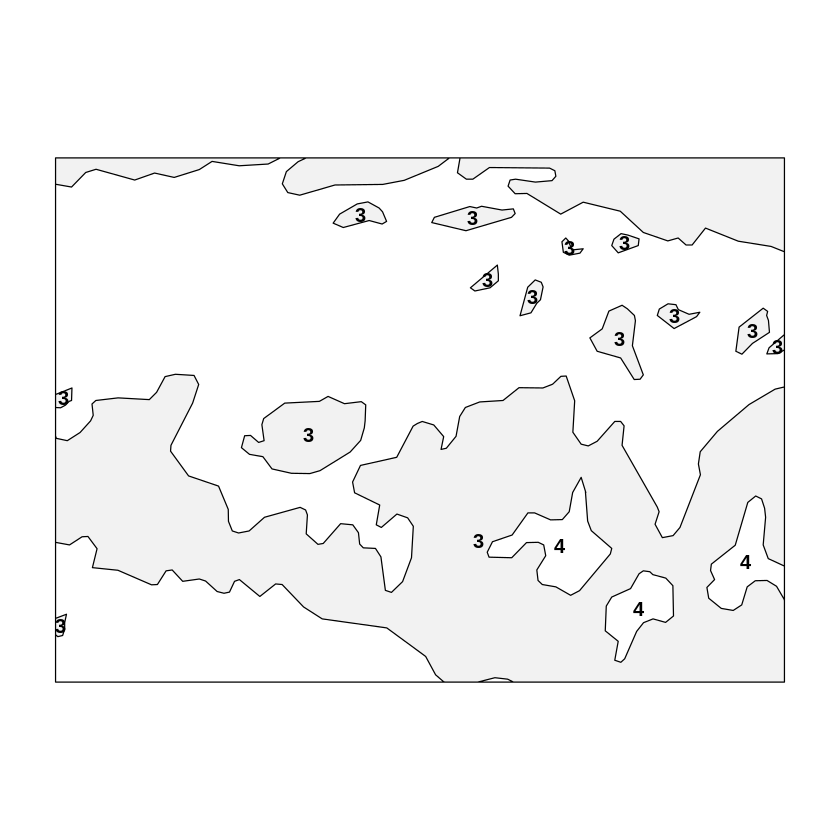

In [42]:
load("high.RData")
manitoulin_sp <- high$SP

oopar <- par(mar=c(1,1,1,1)+0.1)
plot(manitoulin_sp, pbg="grey75", col="grey95")
text(t(sapply(slot(slot(manitoulin_sp, "polygons")[[1]], "Polygons"),
 function(x) slot(x, "labpt")))[-c(1,2),], label=high$polydata$level[-c(1,2)],
 col="black", font=2)
par(oopar)
       
       
       
length(slot(manitoulin_sp, "polygons"))
sapply(slot(slot(manitoulin_sp, "polygons")[[1]], "Polygons"),
 function(x) slot(x, "hole"))
sapply(slot(slot(manitoulin_sp, "polygons")[[1]], "Polygons"),
 function(x) slot(x, "ringDir"))
       
       
bb <- bbox(manitoulin_sp)
bb
cs <- c(0.01, 0.01)
cc <- bb[,1]+(cs/2)
cd <- ceiling(diff(t(bb))/cs)
manitoulin_grd <- GridTopology(cellcentre.offset=cc, cellsize=cs, cells.dim=cd)
manitoulin_grd
       
       
p4s <- CRS(proj4string(manitoulin_sp))
manitoulin_SG <- SpatialGrid(manitoulin_grd, proj4string=p4s)
summary(manitoulin_SG)

In [45]:
load("auck_el1.RData")
slot(auck_el1, "grid")
slot(auck_el1, "grid.index")
slot(auck_el1, "coords")

                             x             y
cellcentre.offset 1.742004e+02 -3.749958e+01
cellsize          8.333333e-04  8.333333e-04
cells.dim         1.320000e+03  1.200000e+03

integer(0)

x,y
174.2004,-37.49958
175.2996,-36.50042


In [50]:
slot(auck_el1, "bbox")
object.size(auck_el1)
object.size(slot(auck_el1, "data"))
is.na(auck_el1$band1) <- auck_el1$band1 <= 0 | auck_el1$band1 > 10000
summary(auck_el1$band1)

,min,max
x,174.2,175.3
y,-37.5,-36.5


12677520 bytes

12672728 bytes

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    1.0    23.0    53.0    78.1   106.0   686.0  791938 

In [88]:
library(sf)
library(raster)

load("auck_el1.RData")
summary(auck_el1)
projection(auck_el1)

Object of class SpatialGridDataFrame
Coordinates:
    min   max
x 174.2 175.3
y -37.5 -36.5
Is projected: FALSE 
proj4string :
[+proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0]
Grid attributes:
  cellcentre.offset     cellsize cells.dim
x         174.20042 0.0008333333      1320
y         -37.49958 0.0008333333      1200
Data attributes:
     band1           
 Min.   :-3.403e+38  
 1st Qu.: 0.000e+00  
 Median : 1.000e+00  
 Mean   :-1.869e+34  
 3rd Qu.: 5.300e+01  
 Max.   : 6.860e+02  

[1] "+proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0"

In [90]:
transect_sp <- SpatialPoints(coords=cbind(seq(174.458,175.3,0.000833333), c(-37.03625)), proj4string=CRS("+proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0"))
class(transect_sp)
summary(transect_sp)
projection(transect_sp)

[1] "SpatialPoints"
attr(,"package")
[1] "sp"

Object of class SpatialPoints
Coordinates:
                min       max
coords.x1 174.45800 175.29967
coords.x2 -37.03625 -37.03625
Is projected: FALSE 
proj4string :
[+proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0]
Number of points: 1011

[1] "+proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0"

In [91]:
transect_el1 <- over(auck_el1, transect_sp)
#summary(transect_el1)